# Principal Component Analysis

Let's see about PCA! 

Since, it's not exactly a machine learning algorithm, but instead an unsupervised machine learning algorithm.
## PCA Review:
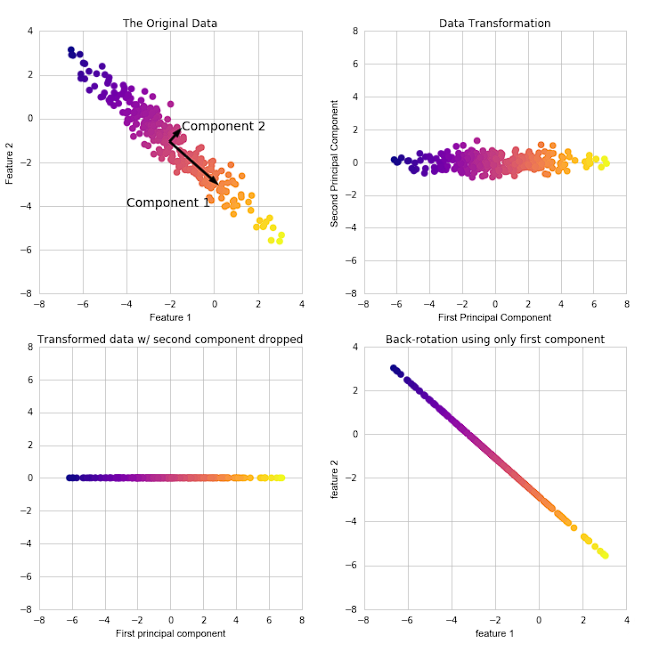

In [20]:
## importing required libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib widget
%matplotlib inline

## To display all columns:
pd.set_option('display.max_columns',None)

In [4]:
## Loading "breast_cancer" dataset from sklearn:

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [5]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [7]:
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])

In [8]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# PCA Visualization
<font size=3>As we have noticed before it is difficult to visualize high dimensional data, we can use PCA to find the first two principal components and vsiualize data in this new, two dimensional space, with a single scatter plot. Before we do this though, we will need to scale our data so that each feature has a single unit variance.

### Making all features similar by using standard scaler method:

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [16]:
scaled_data = pd.DataFrame(scaler.transform(df), columns=cancer['feature_names'])

In [17]:
scaled_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


<font size=3>PCA with Scikit Learn uses a very similar process to other preprocessing features that come with scikit learn. We Instantiate a PCA object, find the principal componentsusing the fit method then apply the rotation and dimensionality reduction by calling transform(). 
    
<font size=3>We can also specify how many components we want to keep when creating the PCA object.

In [18]:
from sklearn.decomposition import PCA

In [30]:
pca = PCA(n_components=2)

In [31]:
pca.fit(scaled_data)

PCA(n_components=2)

In [32]:
## Now we can transform this data to its first two component analysis.
x_pca = pca.transform(scaled_data)

In [33]:
scaled_data.shape, x_pca.shape

((569, 30), (569, 2))

In [34]:
x_pca

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

Text(0, 0.5, 'Second principal component')

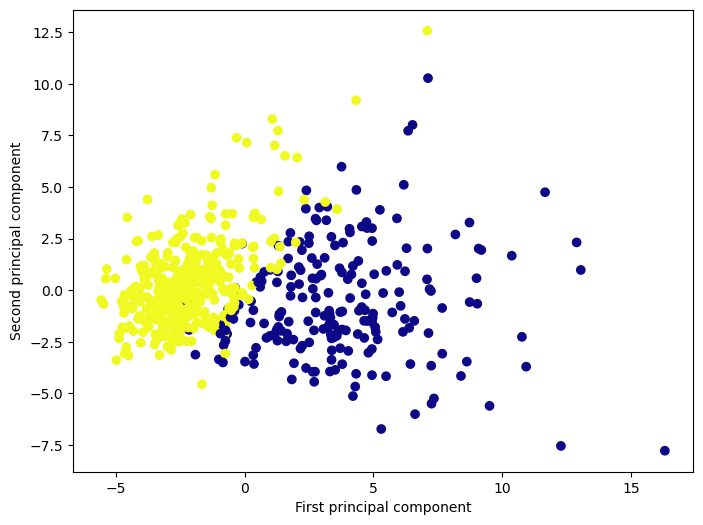

In [35]:
## Plotting the converted dataset:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1],c=cancer['target'], cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')

## trying to plot 3D visuals:

In [36]:
pca = PCA(n_components=3)

In [37]:
pca.fit(scaled_data)

PCA(n_components=3)

In [38]:
x_pca=pca.transform(scaled_data)

In [39]:
x_pca.shape

(569, 3)

In [40]:
x_pca

array([[ 9.19283683,  1.94858308, -1.12316585],
       [ 2.3878018 , -3.76817173, -0.52929257],
       [ 5.73389628, -1.07517379, -0.55174763],
       ...,
       [ 1.25617928, -1.90229672,  0.56273044],
       [10.37479406,  1.6720101 , -1.87702951],
       [-5.4752433 , -0.67063678,  1.49044328]])

In [41]:
## plotting visuals:
from mpl_toolkits import mplot3d
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

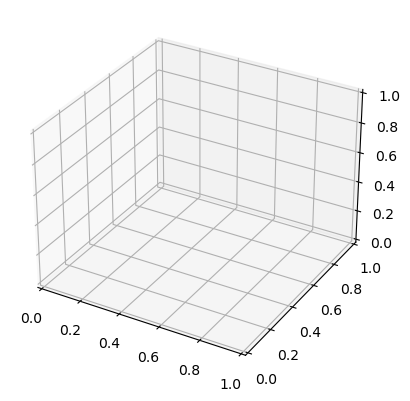

In [42]:
fig = plt.figure()
ax = plt.axes(projection='3d')

In [45]:
# ax.plot3D(x_pca[:,0],x_pca[:,1],x_pca[:,2], 'blue')

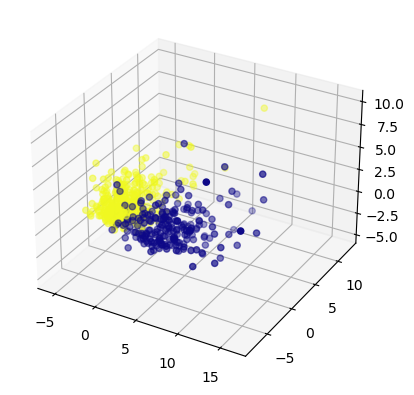

In [47]:
ax = plt.axes(projection='3d')
ax.scatter3D(x_pca[:,0],x_pca[:,1],x_pca[:,2], c=cancer['target'], cmap='plasma')